> <div class = 'markdown-google-sans'>
> <h1>PERCEPTRON</h1>
> <p>A perceptron is a basic building block in deep learning that works in a somewhat similar way as Logistic Regression works. It’s a simple type of artificial neuron used for linear regression and binary classification tasks</p></div>


In [20]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

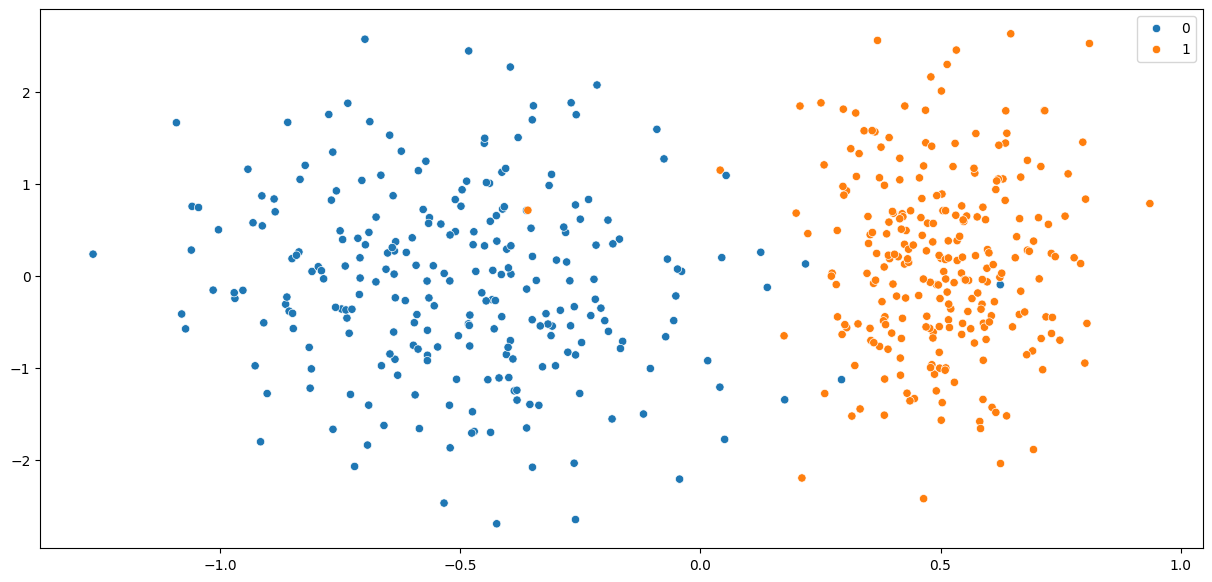

In [21]:
X, y = make_classification(
    n_samples = 500,
    n_features = 2,
    n_informative = 1,
    n_redundant = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    class_sep = 0.5,
    random_state = 42
)

plt.figure(figsize=(15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.show()

> <div class = "markdown-google-sans"><h1>WORKING OF PERCEPTRON</h1>
> <ul>
  <li>Inputs: It takes in multiple pieces of information, which we call inputs.</li><br>
  <li>Weights: Each input is associated with a weight, which represents how important that input is.</li><br>
  <li>Weighted Sum: The perceptron multiplies each input by its weight and adds them all up. This is like calculating a total score based on how important each piece of information is.</li><br>
  <li>Activation Function: After calculating the weighted sum, the perceptron uses a function to make a final decision. In its simplest form, this is a step function. If the weighted sum is above a certain threshold, it outputs one option (like "yes" for taking an umbrella). If it’s below, it outputs the other option (like "no").</li>
</ul></div>


In [22]:
class Perceptron:
    def __init__(self, lr, epochs):
        self.coef_ = None       # Weights for input features
        self.intercept_ = None  # Bias term
        self.lr = lr            # Learning rate
        self.epochs = epochs    # Number of training iterations

    def step(self, fx):
        # Activation function: returns 1 if fx >= 0, otherwise -1
        # This is for internal Perceptron logic (labels -1, 1)
        return 1 if fx >= 0 else -1

    def fit(self, X_train, y_train_original):
        # Convert y_train_original (0, 1) to y_train (internally -1, 1)
        y_train = np.where(y_train_original == 1, 1, -1)

        # Initialize weights randomly
        self.coef_ = np.random.randn(X_train.shape[1])
        self.intercept_ = 0

        # Training loop
        for _ in range(self.epochs):
            # Process training examples in random order
            for idx in np.random.permutation(X_train.shape[0]):
                # Calculate prediction using the internal -1/1 labels
                y_hat_internal = self.step(np.dot(X_train[idx], self.coef_) + self.intercept_)

                # Update weights if prediction is incorrect based on internal labels
                # The update rule (y_train[idx] - y_hat_internal) is based on error correction, not gradient descent - Gives the direction to move towards global minima
                if y_hat_internal != y_train[idx]:
                    self.coef_ += self.lr * (y_train[idx] - y_hat_internal) * X_train[idx]
                    self.intercept_ += self.lr * (y_train[idx] - y_hat_internal)

    def predict(self, X_test):
        # Calculate weighted sum + bias
        ans = np.dot(X_test, self.coef_) + self.intercept_
        # Apply step function, then convert -1/1 to 0/1 for external output
        return np.where(ans >= 0, 1, 0) # Use >= 0 for the positive class (1) based on standard perceptron

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
model = Perceptron(0.01, 1000)
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

-0.039999999999999994
[0.14204578 0.01401883]


In [25]:
f1_score(y_test, model.predict(X_test))

0.9787234042553191

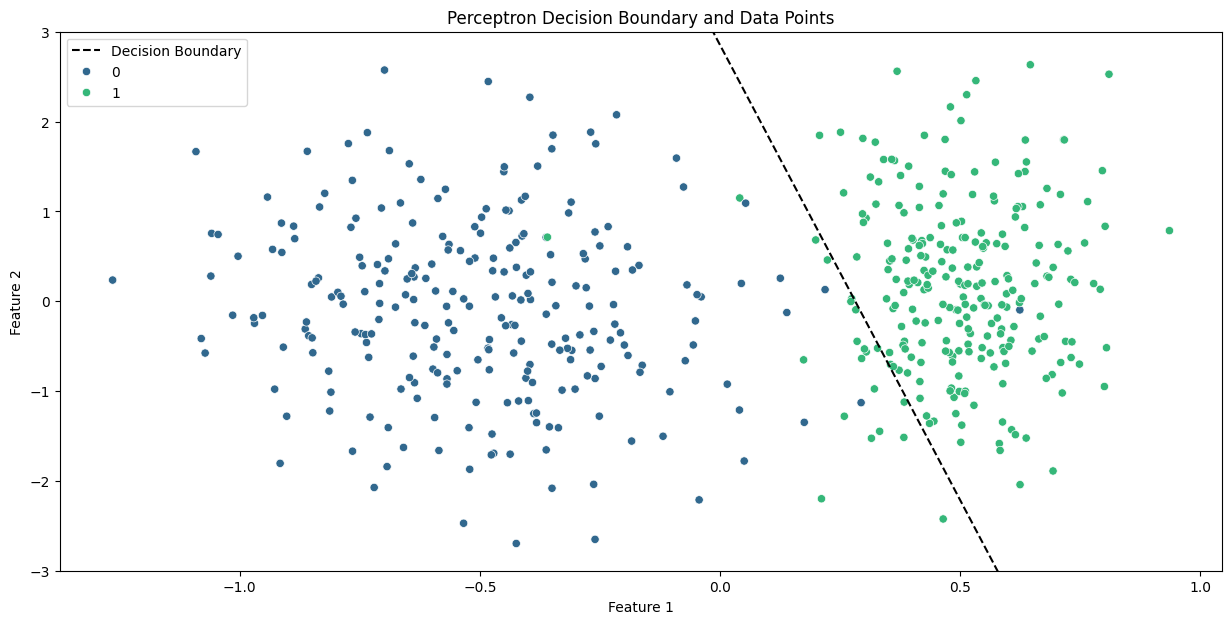

In [26]:
# Assuming X is your feature matrix and y is the target array
# Calculate the decision boundary
weight = -model.coef_[0] / model.coef_[1]
bias = -model.intercept_ / model.coef_[1]

# Create a range of values for the decision boundary plot
temp_x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 500)

# Decision boundary equation
temp_x2 = weight * temp_x1 + bias

# Plot the decision boundary
plt.figure(figsize=(15, 7))

# Plot decision boundary
plt.plot(temp_x1, temp_x2, 'k--', label='Decision Boundary')

# Plot the data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', legend='full')

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Data Points')

# Add a legend and show the plot
plt.ylim(-3, 3)
plt.legend()
plt.show()

<hr>

> <div class = 'markdown-google-sans'><h1>Sklearn Class - Perceptron</h1>
> <p>Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier. In fact, Perceptron() is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).</p></div>


In [27]:
from sklearn.linear_model import Perceptron
model = Perceptron(
    penalty=None, # Regularization parameter l2' or 'l1' or None
    alpha=0.0001, # Regularization Coefficient
    fit_intercept=True, # Calculate the intercept or not
    max_iter=1000, # Number of Iterations for GD
    tol=1e-3, # The convergence threshold. If the diff of the loss between two consecutive epochs is less than tol, convergence is assumed.
    shuffle=True, # Whether or not the training data should be shuffled after each epoch
    verbose=0, # Training phase printing
    eta0=1.0, # Learning Rate
    n_jobs=-1,
    random_state=42,
    validation_fraction=0.1, # The proportion of training data to set aside as validation set for early stopping
    n_iter_no_change=5 # The number of iterations with no improvement to wait before early stopping
)

# How validation_fraction works: If the model's performance on the validation set doesn't improve for a certain number of epochs (set by n_iter_no_change), training stops early to prevent overfitting.

In [28]:
model.fit(X_train, y_train)

Perceptron(n_jobs=-1, random_state=42)

In [29]:
print(model.coef_)
print(model.intercept_)

[[8.20161597 0.85333221]]
[-1.]


In [30]:
f1_score(y_test, model.predict(X_test))

1.0

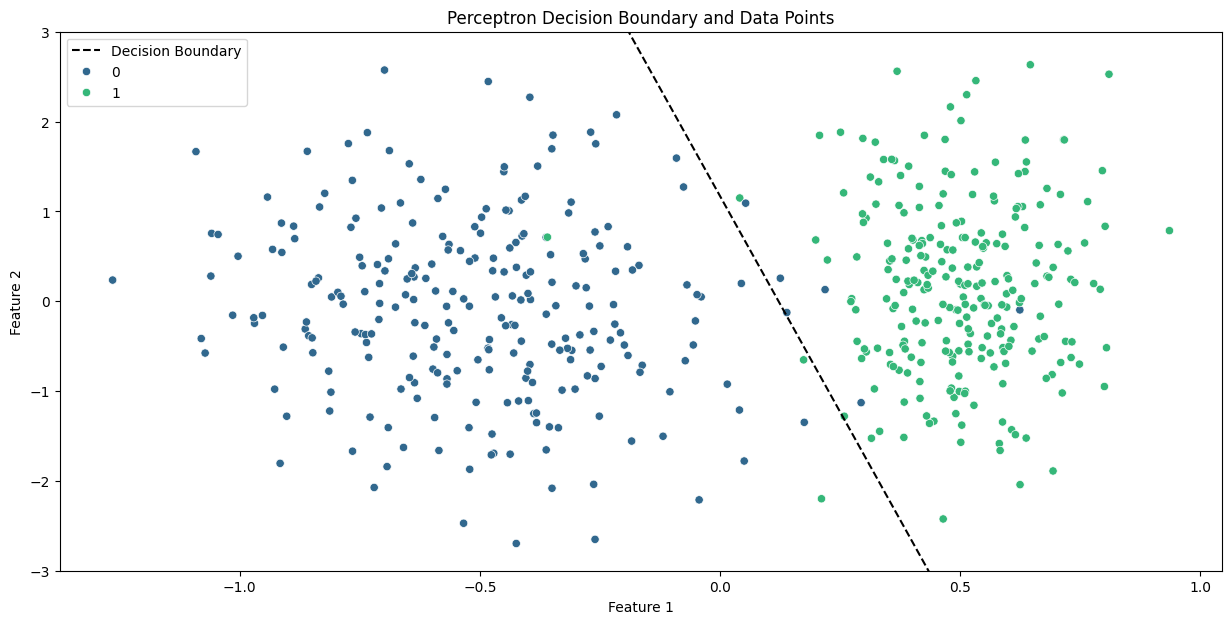

In [31]:
# Assuming X is your feature matrix and y is the target array
# Calculate the decision boundary
weight = -model.coef_[0][0] / model.coef_[0][1]
bias = -model.intercept_ / model.coef_[0][1]

# Create a range of values for the decision boundary plot
temp_x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 500)

# Decision boundary equation
temp_x2 = weight * temp_x1 + bias

# Plot the decision boundary
plt.figure(figsize=(15, 7))

# Plot decision boundary
plt.plot(temp_x1, temp_x2, 'k--', label='Decision Boundary')

# Plot the data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', legend='full')

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Data Points')

# Add a legend and show the plot
plt.ylim(-3, 3)
plt.legend()
plt.show()

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X_train, y_train)
assert (sgd_clf.coef_ == model.coef_).all()
assert (sgd_clf.intercept_ == model.intercept_).all()
print("All Good")

All Good


<hr>